# Density Distributions

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

<br>

#### Import Data

In [3]:
usa = pd.read_csv('../data/census_2015/acs2015_census_tract_data.csv')

<br>

In [12]:
usa.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


#### Extract The Census Data for California

In [10]:
ca = usa[usa['State'] == 'California']



<br>

#### Initial Exploration

In [7]:
ca.head()

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
3560,6001400100,California,Alameda,2952,1454,1498,3.4,70.7,3.6,0.0,...,0.0,2.3,17.8,32.5,1522,75.5,10.0,14.5,0.0,5.6
3561,6001400200,California,Alameda,1984,938,1046,9.1,72.9,1.5,0.0,...,6.1,4.6,12.8,25.4,1222,73.4,13.3,12.8,0.5,2.2
3562,6001400300,California,Alameda,5377,2362,3015,6.9,62.1,12.9,0.2,...,6.5,4.6,10.7,29.5,3277,74.0,18.6,7.4,0.0,8.8
3563,6001400400,California,Alameda,4105,1933,2172,9.1,63.2,11.0,0.9,...,3.6,17.2,9.7,27.2,2614,69.7,19.2,10.9,0.2,3.3
3564,6001400500,California,Alameda,3651,1628,2023,14.2,51.7,24.3,0.0,...,3.8,9.1,15.1,28.6,2286,79.6,11.8,8.6,0.0,6.5


<br>

**Let's take a look at the column information**

In [35]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8057 entries, 3560 to 11616
Data columns (total 37 columns):
CensusTract        8057 non-null int64
State              8057 non-null object
County             8057 non-null object
TotalPop           8057 non-null int64
Men                8057 non-null int64
Women              8057 non-null int64
Hispanic           8012 non-null float64
White              8012 non-null float64
Black              8012 non-null float64
Native             8012 non-null float64
Asian              8012 non-null float64
Pacific            8012 non-null float64
Citizen            8057 non-null int64
Income             7956 non-null float64
IncomeErr          7956 non-null float64
IncomePerCap       8007 non-null float64
IncomePerCapErr    8007 non-null float64
Poverty            7987 non-null float64
ChildPoverty       7959 non-null float64
Professional       7989 non-null float64
Service            7989 non-null float64
Office             7989 non-null float64

In [37]:
ca['Income']

3560     174113.0
3561     141806.0
3562      84598.0
3563     102386.0
3564      76038.0
3565      60804.0
3566      39614.0
3567      59886.0
3568      57003.0
3569      44766.0
3570      59500.0
3571      78203.0
3572      36788.0
3573      28532.0
3574      48490.0
3575      37946.0
3576      72386.0
3577      26806.0
3578      41500.0
3579      29835.0
3580      19042.0
3581      20270.0
3582      40169.0
3583      17278.0
3584      31319.0
3585      17609.0
3586      59250.0
3587      57064.0
3588      42982.0
3589      40000.0
           ...   
11587     46458.0
11588     45159.0
11589     45658.0
11590     38869.0
11591     45833.0
11592     70481.0
11593     46397.0
11594     40172.0
11595     56667.0
11596     82813.0
11597     73250.0
11598     86111.0
11599     81447.0
11600     65243.0
11601     47456.0
11602     59797.0
11603     32376.0
11604     45321.0
11605     22034.0
11606     26829.0
11607     55640.0
11608     27659.0
11609     34274.0
11610     44529.0
11611     

<br>

**Let's check out the `value_counts()` for the `County` column.**

In [9]:
ca['County'].value_counts()

Los Angeles        2346
San Diego           628
Orange              583
Riverside           453
Santa Clara         372
San Bernardino      369
Alameda             361
Sacramento          317
Contra Costa        208
Fresno              199
San Francisco       197
Ventura             174
San Mateo           158
Kern                151
San Joaquin         139
Sonoma              100
Solano               96
Stanislaus           94
Monterey             94
Santa Barbara        90
Placer               85
Tulare               78
Marin                56
San Luis Obispo      54
Santa Cruz           53
Butte                51
Merced               49
Shasta               48
El Dorado            43
Yolo                 41
Napa                 40
Imperial             31
Humboldt             31
Kings                27
Madera               23
Sutter               21
Mendocino            21
Nevada               20
Lake                 15
Yuba                 14
Siskiyou             14
Tuolumne        

<br>

### Plot Swarm of a single column

Seaborn is a plotting library built on top of matplotlib, check out how easy it is to plot a swarm plot, which is a great plot for visualizing a distribution based on some other column.

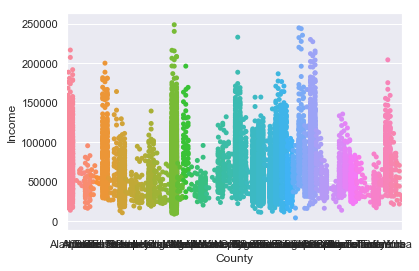

In [13]:
sns.swarmplot(x = "County", y = "Income", data=ca)
plt.show()

<br>

#### Limit the scope of the `ca` dataframe to only contain a few select counties.

We will be making a list containing the names of the counties that we are most interested in, as the plot above with ALL of the unique values of `County` is way too disorienting to provide any kind of meaningful information.

In [16]:
counties_to_examine = ["San Joaquin", 
                       "Los Angeles", 
                       "San Diego", 
                       "Contra Costa"]

<br>

**The pandas `.isin()` method, lets us check every value of a column against a list of values.**

Think of it as an extension of `ca['County] == 'San Diego` which only lets us check against a single value.

> This is WRONG `ca['County'] == ['San Diego','Los Angeles', etc]`

> This is RIGHT `ca['County'].isin([counties_to_examine])`

In [24]:
is_in_counties_list = ca['County'].isin(counties_to_examine)

<br>

* **TRUE:** The boolean series `is_in_counties_list` has a `True` value for any county that is contained in `counties_to_examine`, aka if the `County` value of a row in `ca` corresonds to `Los Angeles`, `San Joaquin`, `San Diego`, or `Contra Costa`, the boolean value at that same index, in `is_in_counties_list`, will be `True`.

<br>

* **FALSE:** The boolean series `is_in_counties_list` has a `False` value for any county that is NOT contained in `counties_to_examine`, aka if the `County` value of a row in `ca` corresonds to say `Orange County`, `Alameda`,`Santa Barbara`, `etc...`, the boolean value at that same index, in `is_in_counties_list`, will be `False`.

In [25]:
county_df = ca[is_in_counties_list]

<br>

**Lets go ahead and check the `unique` values of `County` in `county_df`, compare that to the `unique` values of `County` in `ca`. Its also useful to compare the `Shape`, notice that `county_df` has many fewer rows!**

In [26]:
print("----------")
print("county_df:")
print("----------")

print("Rows x Columns:", county_df.shape)
print(county_df["County"].unique())


print()


print("----------")
print("ca:")
print("----------")

print("Rows x Columns:", ca.shape)
print(ca["County"].unique())

----------
county_df:
----------
Rows x Columns: (3321, 37)
['Contra Costa' 'Los Angeles' 'San Diego' 'San Joaquin']

----------
ca:
----------
Rows x Columns: (8057, 37)
['Alameda' 'Alpine' 'Amador' 'Butte' 'Calaveras' 'Colusa' 'Contra Costa'
 'Del Norte' 'El Dorado' 'Fresno' 'Glenn' 'Humboldt' 'Imperial' 'Inyo'
 'Kern' 'Kings' 'Lake' 'Lassen' 'Los Angeles' 'Madera' 'Marin' 'Mariposa'
 'Mendocino' 'Merced' 'Modoc' 'Mono' 'Monterey' 'Napa' 'Nevada' 'Orange'
 'Placer' 'Plumas' 'Riverside' 'Sacramento' 'San Benito' 'San Bernardino'
 'San Diego' 'San Francisco' 'San Joaquin' 'San Luis Obispo' 'San Mateo'
 'Santa Barbara' 'Santa Clara' 'Santa Cruz' 'Shasta' 'Sierra' 'Siskiyou'
 'Solano' 'Sonoma' 'Stanislaus' 'Sutter' 'Tehama' 'Trinity' 'Tulare'
 'Tuolumne' 'Ventura' 'Yolo' 'Yuba']


<br>

#### Plot Swarm of a single column - again.

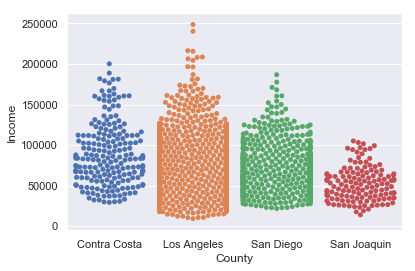

In [27]:
_ = sns.swarmplot(x = "County", y = "Income", data=county_df)
plt.show()

**A Violin Plot is similar to a swarm plot, except we give up a bit of the granularity of the Swarm Plot, in favor of IQR and Median markers.**

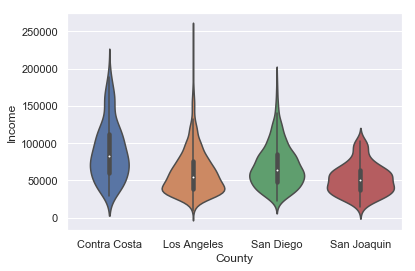

In [28]:
sns.violinplot(x = "County", y = "Income", data=county_df)
plt.show()

<br>

### Plot ECDF of a single column.

> **ECDF** = Empirical Cumulative Distribution Function

In [29]:
def prep_ecdf(data):
    
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y

<br>

#### Prepare and Plot Income data for San Diego

In [31]:
# Prepare Income Data
is_sandiego = ca["County"] == "San Diego"

sd = ca[is_sandiego]
sd_income = sd["Income"]

x,y = prep_ecdf(sd_income)

<br>

**Lets `print()` `x` and `y` to get a better feel for what an `ECDF` is doing.**

In [32]:
print(x)
print("-"*60)
print(y)

[ 21657.  22713.  22837.  22951.  23023.  24044.  24876.  25189.  25721.
  26264.  26298.  26854.  27165.  27601.  27619.  27768.  27793.  27803.
  28698.  28891.  28963.  29086.  30070.  30132.  30536.  30635.  30661.
  30804.  30915.  31250.  31392.  31488.  31532.  31771.  31796.  31839.
  32208.  32555.  32568.  32679.  32708.  32961.  33028.  33405.  33673.
  33750.  33995.  34119.  34151.  34191.  34631.  34738.  34817.  35066.
  35429.  35525.  35729.  35925.  36007.  36034.  36113.  36311.  36336.
  36458.  36468.  36686.  36750.  36832.  36875.  36927.  36991.  37205.
  37210.  37740.  37788.  37813.  37821.  37857.  37923.  38090.  38464.
  38690.  38726.  39041.  39273.  39421.  39775.  40132.  40250.  40255.
  40405.  40493.  40577.  40941.  40988.  41042.  41067.  41203.  41250.
  41284.  41497.  41591.  41627.  41670.  41807.  41927.  41995.  42103.
  42214.  42236.  42379.  42576.  42582.  42649.  42663.  42870.  43103.
  43125.  43175.  43190.  43314.  43523.  43575.  4

<br>

#### Plot the ECDF for San Diego Income

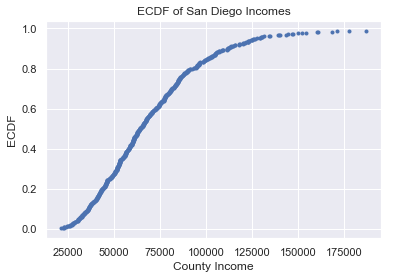

In [33]:
# Set up Figure
plt.figure()

# Grab the `axis` and save to `ax`
ax = plt.gca()

# ax.plot() is a simple `line plot`
ax.plot(x, y, marker = ".", linestyle = "none")

# Make it Pretty
ax.set_title("ECDF of San Diego Incomes")
ax.set_xlabel("County Income")
ax.set_ylabel("ECDF")

# Remove annoying "out" stuff when printing plot.
plt.show()

<br>

#### Prepare and Plot Income data for All counties in `county_df`

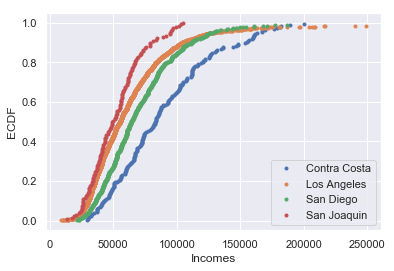

In [34]:
# Set up Figure
plt.figure()

# Grab the `axis` and save to `ax`
ax = plt.gca()


# For loop adds a new line plot to `ax` each iteration, 
# and adds name of each unique 'county' to 'labels' list,
# this is for use in the legend.
labels = []
for county in county_df["County"].unique():
    
    county_inc = ca[ca["County"] == county]["Income"]
    
    x,y = prep_ecdf(county_inc)
    
    ax.plot(x, y, marker = ".", linestyle = "none")

    labels.append(county)


# Make It Pretty!
# A Legend is a MUST when you have multiple plots on a single ax
ax.legend(labels, loc='lower right')
ax.set_xlabel("Incomes")
ax.set_ylabel('ECDF')
plt.show()

In [ ]:
#What can we say about the incomes of these 4 counties? Take a minute to ponder this.